# Excited Electronic States

An electron can be promoted from the ground state to an excited electronic state by the absorption of a photon in the ultraviolet (UV) or the visible region of the electromagnetic spectrum.

## Different Types of Energy Transitions
There are different types of energy transitions. A molecule in the ground state will be promoted to an excited state of a similar geometry. This is called vertical absorption. After that, the excited molecule will relax to the minimum geometry in the excited state. When it goes down to the ground state, it will be deexcited to a similar geometry, which is called vertical emission. The difference in energy between the ground and excited minima corresponds to the adiabatic transition.

<img src="energy_transitions.png" alt="drawing" width="600px"/>

## Valence vs Rydberg States
Low energy electronic excitations will promote an the electron to a low-lying unoccupied energy level. Such a state is called a valence state. However, sometimes the electron can be excited to a very high energy level just below ionization. The electron becomes almost detached. In this situation, the system can be thought of as an electron interacting with a molecular cation, which is analogous to hydrogenic systems. The Rydberg orbitals are extremely diffuse and therefore basis sets with diffuse functions must be used in the calculation.

## Computational Considerations
Consider the single excitation of one electron from a closed-shell molecule:
\begin{align}
    \underline{\phantom{\uparrow \downarrow}} & \quad \underline{\phantom{\uparrow \downarrow}} \quad \underline{\phantom{\uparrow \downarrow}}\\ 
    \underline{\phantom{\uparrow \downarrow}} & \quad \underline{\phantom{\uparrow \downarrow}} \quad \underline{\phantom{\uparrow \downarrow}}\\
    \vdots \vdots                             & \quad \vdots \vdots                             \quad \vdots \vdots\\
    \underline{\phantom{\uparrow \downarrow}} & \quad \underline{\phantom{\uparrow} \downarrow} \quad \underline{\uparrow \phantom{\downarrow}}\\ 
    \underline{\phantom{\uparrow \downarrow}} & \quad \underline{\phantom{\uparrow \downarrow}} \quad \underline{\phantom{\uparrow \downarrow}}\\
    \underline{\phantom{\uparrow \downarrow}} & \quad \underline{\phantom{\uparrow \downarrow}} \quad \underline{\phantom{\uparrow \downarrow}}\\ 
    \underline{\uparrow \downarrow}           & \quad \underline{\uparrow \phantom{\downarrow}} \quad \underline{\phantom{\uparrow} \downarrow}\\
    \underline{\uparrow \downarrow}           & \quad \underline{\uparrow \downarrow}           \quad \underline{\uparrow \downarrow} \\
    \vdots \vdots                             & \quad \vdots \vdots                             \quad \vdots \vdots \\
    \underline{\uparrow \downarrow}           & \quad \underline{\uparrow \downarrow}           \quad \underline{\uparrow \downarrow}\\
    \underline{\uparrow \downarrow}           & \quad \underline{\uparrow \downarrow}           \quad \underline{\uparrow \downarrow}\\
    \textbf{Ground State}                     & \quad  \textbf{Excited State}
\end{align}

The ground state wavefunction can be represented by the following Slater determinat:
\begin{align}
    {^1\Psi_0} = |\psi_1^2 \psi_2^2 \psi_3^2 \cdots \psi_{N/2}^2 \rangle 
\end{align}
where $N$ is the number of electrons. If an electron is excited from the highest occupied molecular orbital (HOMO) to virtual orbital $a$, the excited state can be written as:
\begin{align}
    \Psi_{N/2}^a = |\psi_1^2 \psi_2^2 \psi_3^2 \cdots \psi_{N/2} \overline{\psi}_a \rangle
\end{align}
where the absence of the bar indicates $\alpha$ spin and the presence of the bar indicates $\beta$ spin.
Notice that an equally valid represenation of the excited state is given by
\begin{align}
    \Psi_{N/2}^a = |\psi_1^2 \psi_2^2 \psi_3^2 \cdots \overline{\psi}_{N/2} \psi_a \rangle
\end{align}
as shown in the diagram. In fact, neither excited state representation represents a pure spin state, but their linear combination is. It is often the case that excited states cannot be represented by a single Slater determinant. For simplicity, we will represent a pure singlet spin state as
\begin{align}
    {^1 \Psi_{N/2}^a} = |\psi_1^2 \psi_2^2 \psi_3^2 \cdots \psi_{N/2} \overline{\psi}_a \rangle
\end{align}
implying that that the appropriate linear combination of spin states is taken to generate a pure singlet state.

Computationally, both occupied and virtual orbitals are generated from the Hartree-Fock procedure. However, the Hartree-Fock procedure minimizes the energy of the Slater determinant and the energy is determined by the occupied orbitals only. Thus, the virtual orbitals are not optimized. When an electron is excited to a high energy orbital, one of the occupied orbitals loses an electron and one of virtual orbitals gains an electron. All the electrons experience a difference in their average interactions with the other electrons. Thus, none of the occupied orbitals is optimized for the excited state. Thus, the energy of the excited state using the above wavefunction 
\begin{align}
E \left [ {^1 \Psi_{N/2}^a} \right] = \langle {^1 \Psi_{N/2}^a} | H | {^1 \Psi_{N/2}^a} \rangle
\end{align}
will be unphysically too high.

What is the solution to the above problem? One can think of reoptimizing all the orbitals in the excited state. However, optimization is not easy unless the given excited state is the lowest state of a given symmetry. Otherwise, the optimization process will lead to the lower energy solution. We will discuss below a few approaches for modeling excited states.

### CIS
The CIS method is configuration interaction singles. As discussed before, in CIS, the wavefunction is represented by the Hartree-Fock ground state wavefunction and the sum of all possible singly excited states. The singly excited states do not mix with the ground state because of Brillouin’s theorem. However, the singly excited states will mix with each other and their description will improve. As illustrated in the figure below, diagonalizing the CIS matrix yields the excited state energies.

<img src="cis.png" alt="drawing" width="600px"/>

Because in CIS only single excitations are considered, CIS lacks dynamical correlation for the excited states, and the quality of description of the excited state is similar to the quality of Hartree-Fock theory in describing the ground state. The CIS(D) method includes a perturbation theory correction to the CIS method to account for some electron correlation.

### MCSCF
Excited state energies can be calculated as higher roots of the CI procedure in MCSCF. Estimating dynamical correlation using e.g. CASPT2 is needed to obtain good accuracy.

### Response Theory
For a molecule subjected to a linear electric field that is fluctuating with a frequency $\omega$, the frequency-dependent polarizability is approximated by
\begin{align}
    \langle \alpha \rangle_\omega = \sum_{i \neq0}^{\rm states} \frac{|\langle \Psi_0|\textbf{r}|\Psi_i \rangle|^2}{\omega - (E_i -E_0)}
\end{align}
where the numerator is called the transition dipole moment. If the frequency is exactly equal to the difference between the ground and excited state energies, there is a pole in the frequency-dependent polarizability and it diverges. The poles can be estimated using various methods called propagator methods, Green's function methods, or equation-of-motion (EOM) methods.

**Time-Dependent DFT (TD-DFT)** or Hartree-Fock methods and **equation-of-motion coupled cluster methods (EOM-CC)** are popular methods for modeling excited states. TD-DFT is successful only for low-energy exciations.

## Example
An example TD-HF calculation is shown below (taken from the Psi4 manual). Notice that the actual spectrum calculated consists of sticks for the peaks. However, it can be artifically broaden.

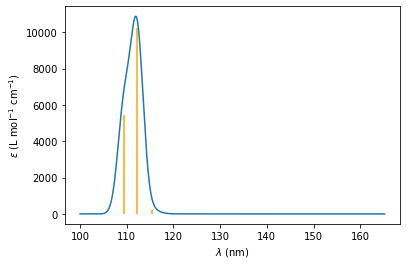

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import psi4

from psi4.driver.procrouting.response.scf_response import tdscf_excitations
from psi4.driver.p4util import spectrum

psi4.core.set_output_file("moxy.out")

moxy = psi4.geometry("""0 1
C  0.152133 -0.035800  0.485797
C -1.039475  0.615938 -0.061249
C  1.507144  0.097806 -0.148460
O -0.828215 -0.788248 -0.239431
H  0.153725 -0.249258  1.552136
H -1.863178  0.881921  0.593333
H -0.949807  1.214210 -0.962771
H  2.076806 -0.826189 -0.036671
H  2.074465  0.901788  0.325106
H  1.414895  0.315852 -1.212218
""", name="(S)-methyloxirane")

psi4.set_options({
    'save_jk': True,
})

e, wfn = psi4.energy("HF/cc-pvdz", return_wfn=True, molecule=moxy)
res = tdscf_excitations(wfn, states=10, triplets="also")

# get poles and residues to plot OPA and ECD spectra
poles = [r["EXCITATION ENERGY"] for r in res]
opa_residues = [np.linalg.norm(r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"])**2 for r in res]

opa_spectrum = spectrum(poles=poles, residues=opa_residues, gamma=0.01, out_units="nm")
plt.figure()
plt.vlines(opa_spectrum["sticks"]["poles"], ymin=0, ymax=opa_spectrum["sticks"]["residues"], color="orange")
plt.plot(opa_spectrum["convolution"]["x"], opa_spectrum["convolution"]["y"])
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$\epsilon$ (L mol$^{-1}$ cm$^{-1}$)")
plt.show()

## Useful Resources

- Cramer, C. J. *Essentials of Computational Chemistry: Theories and Models*, 2nd ed.; John Wiley & Sons: Chichester, England, 2004. (Chapter 14)  
- Jensen, F. *Introduction to Computational Chemistry*, 3rd ed.; John Wiley & Sons: Nashville, TN, 2017. (Section 4.14, Section 6.9)